In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import seaborn as sns

In [3]:
data = pd.read_csv("wine/wine.data", sep=",")

In [4]:
data.shape

(177, 14)

In [5]:
data.columns = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
 "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
 "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# Exercícios

 1. Escolha um novo dataset e construa um programa que calcule as medidas estatísticas. Procure usar as funções apresentadas nessa atividade, assim como, outras que estão disponíveis nas bibliotecas do Python (https://www.scaler.com/topics/pandas/statistical-functions-in-pandas/).

In [6]:
for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        # medidas de tendência central
        print('\t Média = %.2f' % data[col].mean())
        print('\t Mediana = %.2f' % data[col].median())

        print('\t Desvio padrão = %.2f' % data[col].std())
        print('\t Variância = %.2f' % data[col].var())
        print('\t Mínimo = %.2f' % data[col].min())
        print('\t Máximo = %.2f' % data[col].max())

Class:
	 Média = 1.94
	 Mediana = 2.00
	 Desvio padrão = 0.77
	 Variância = 0.60
	 Mínimo = 1.00
	 Máximo = 3.00
Alcohol:
	 Média = 12.99
	 Mediana = 13.05
	 Desvio padrão = 0.81
	 Variância = 0.65
	 Mínimo = 11.03
	 Máximo = 14.83
Malic acid:
	 Média = 2.34
	 Mediana = 1.87
	 Desvio padrão = 1.12
	 Variância = 1.25
	 Mínimo = 0.74
	 Máximo = 5.80
Ash:
	 Média = 2.37
	 Mediana = 2.36
	 Desvio padrão = 0.28
	 Variância = 0.08
	 Mínimo = 1.36
	 Máximo = 3.23
Alcalinity of ash:
	 Média = 19.52
	 Mediana = 19.50
	 Desvio padrão = 3.34
	 Variância = 11.13
	 Mínimo = 10.60
	 Máximo = 30.00
Magnesium:
	 Média = 99.59
	 Mediana = 98.00
	 Desvio padrão = 14.17
	 Variância = 200.90
	 Mínimo = 70.00
	 Máximo = 162.00
Total phenols:
	 Média = 2.29
	 Mediana = 2.35
	 Desvio padrão = 0.63
	 Variância = 0.39
	 Mínimo = 0.98
	 Máximo = 3.88
Flavanoids:
	 Média = 2.02
	 Mediana = 2.13
	 Desvio padrão = 1.00
	 Variância = 1.00
	 Mínimo = 0.34
	 Máximo = 5.08
Nonflavanoid phenols:
	 Média = 0.36
	 Median

2. Use o dataset escolhido e mostre por meio das representações gráficas (histogramas) as principais características. Procure usar as funções apresentadas nesta atividade.

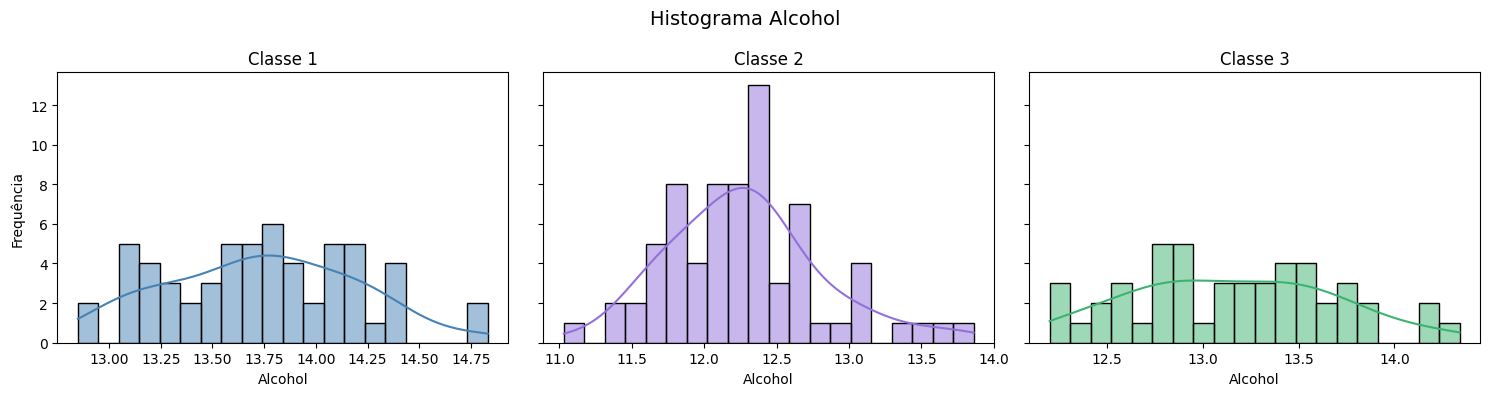

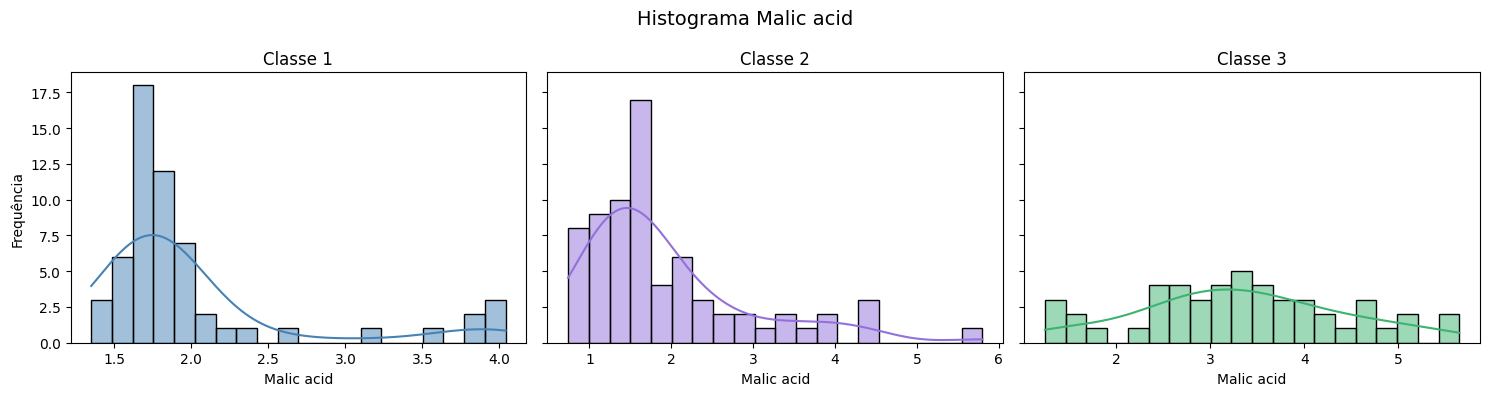

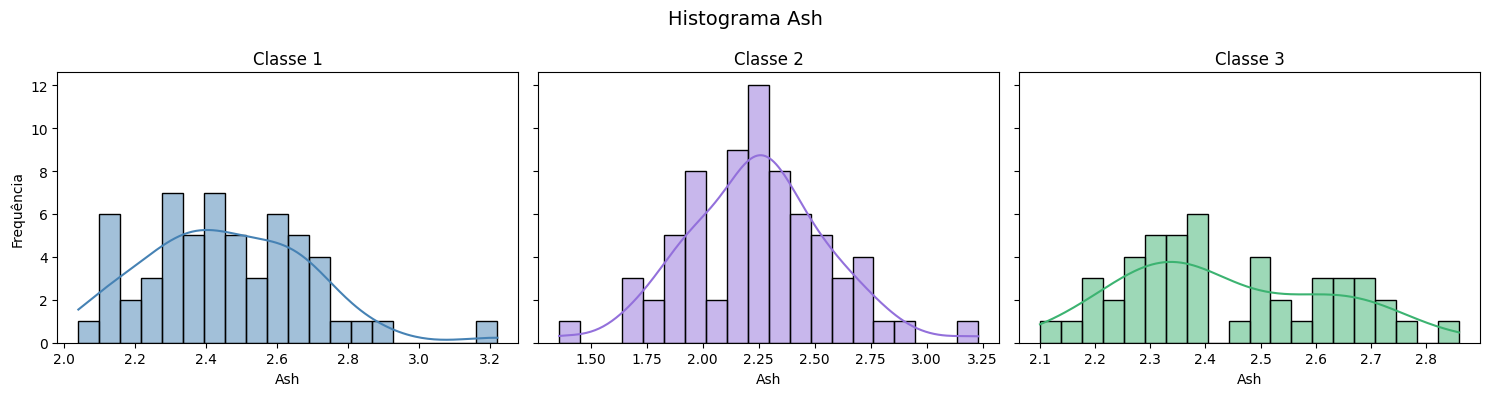

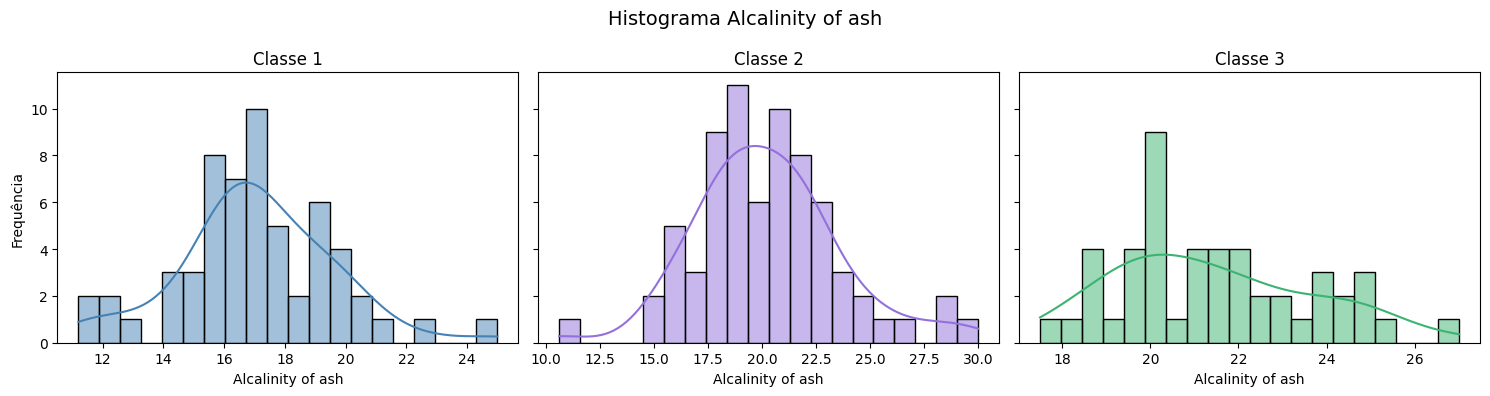

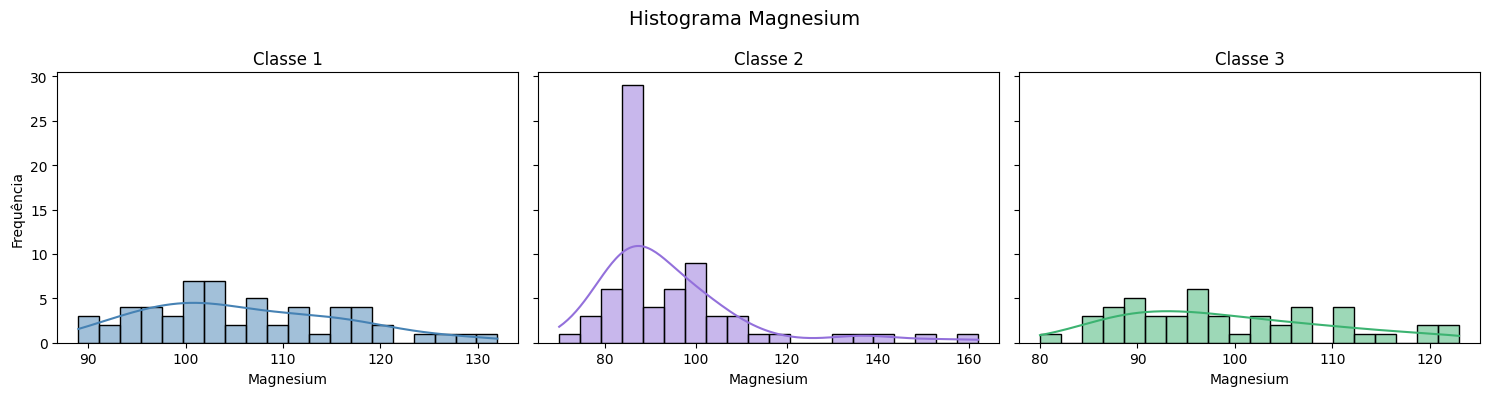

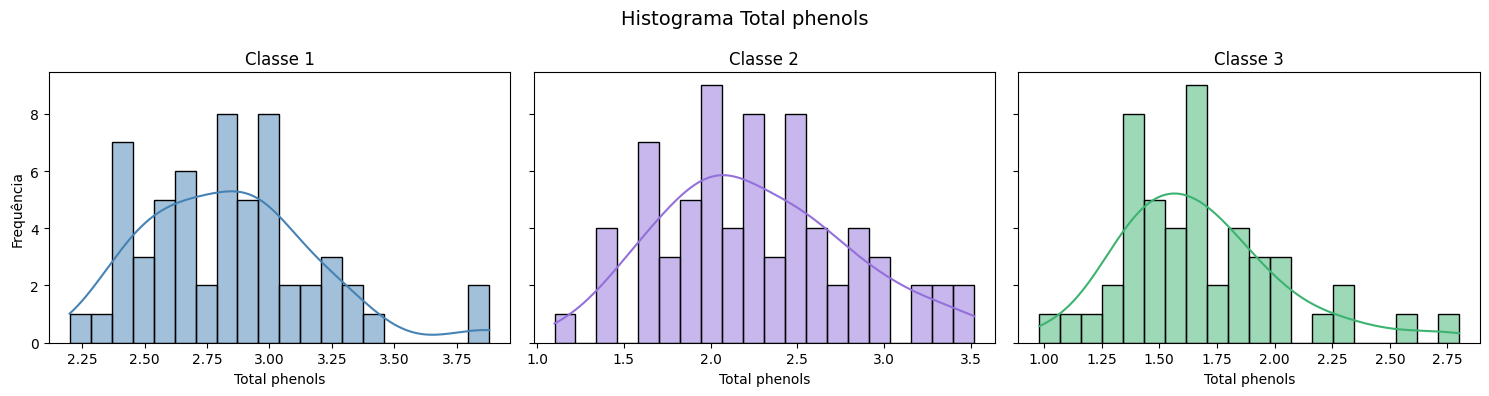

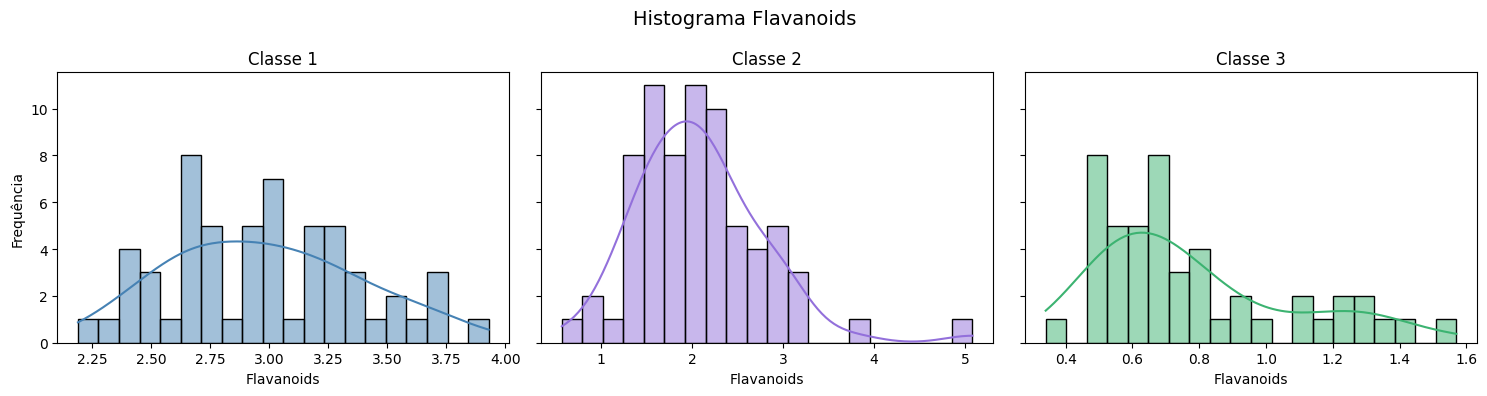

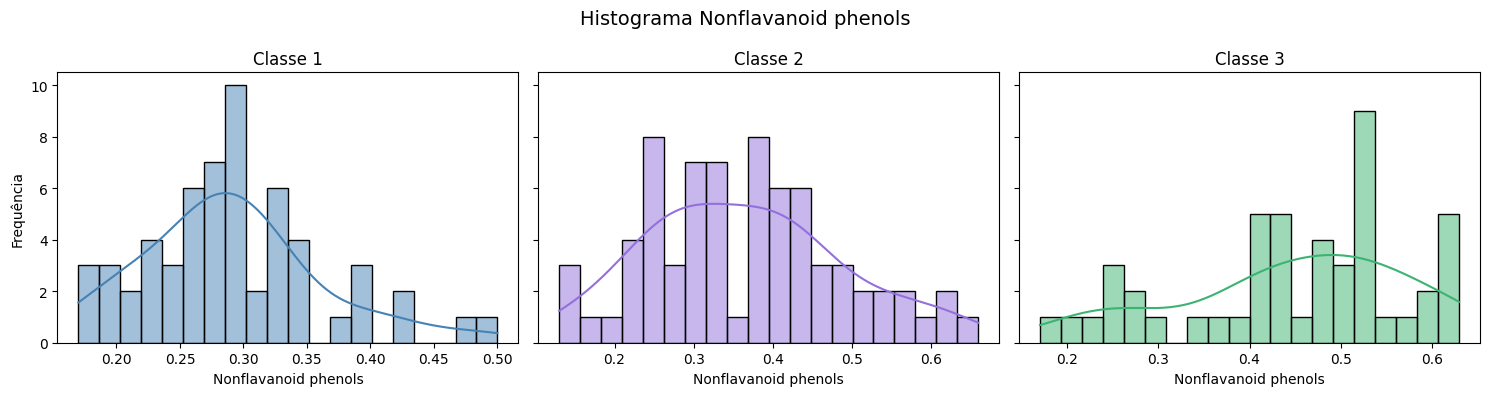

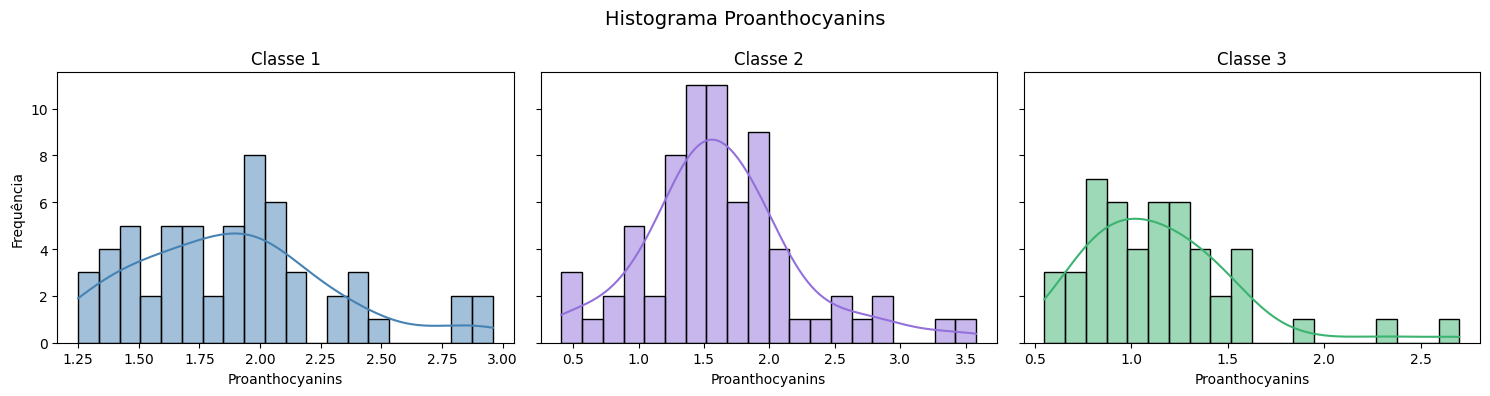

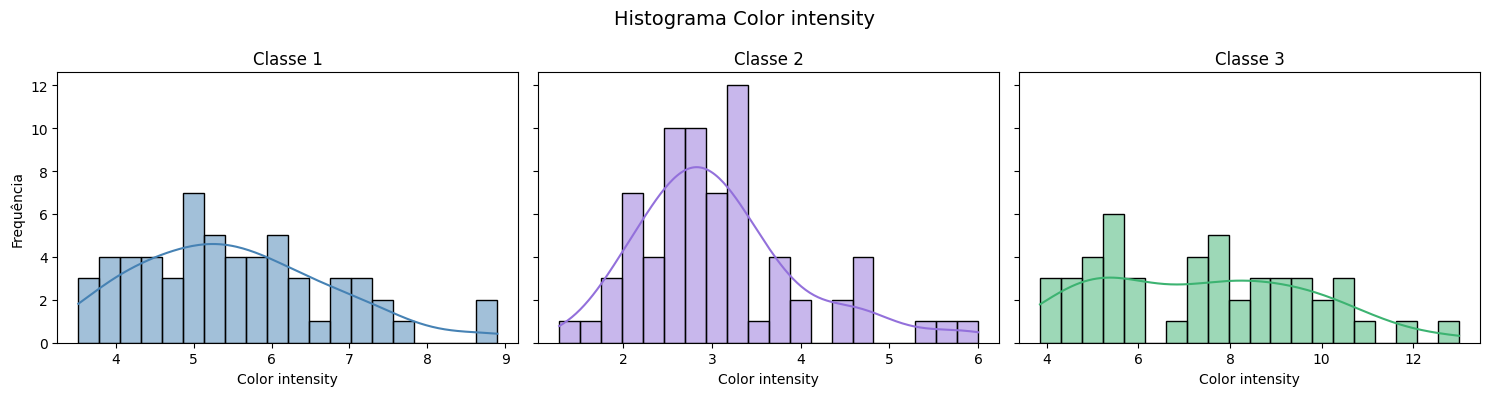

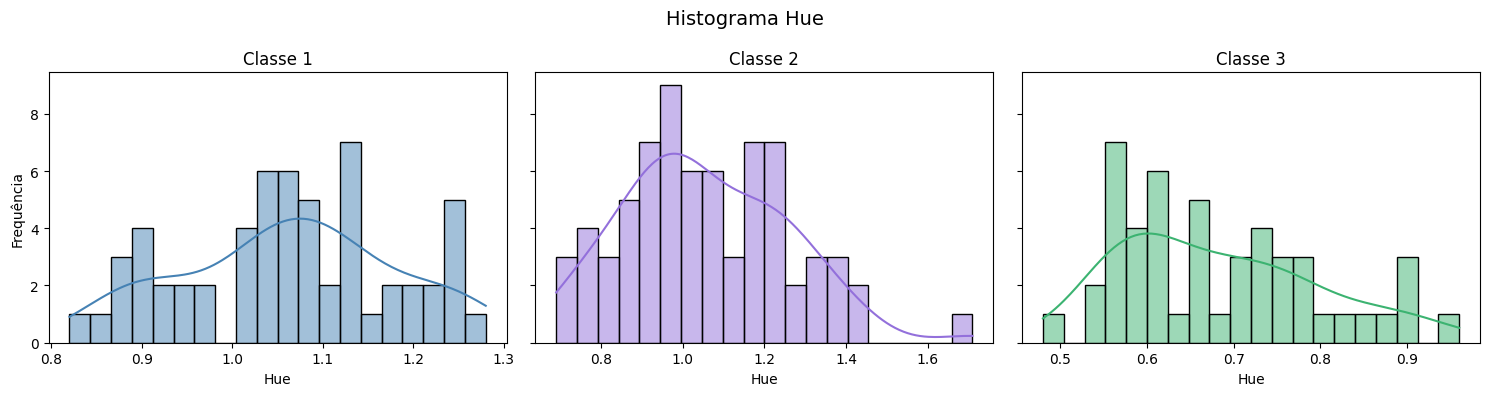

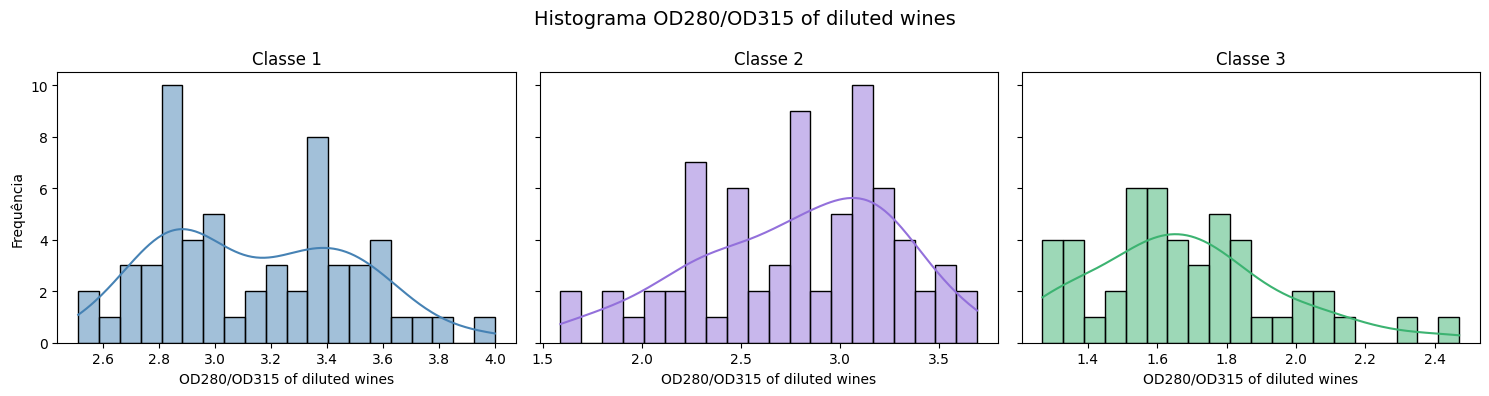

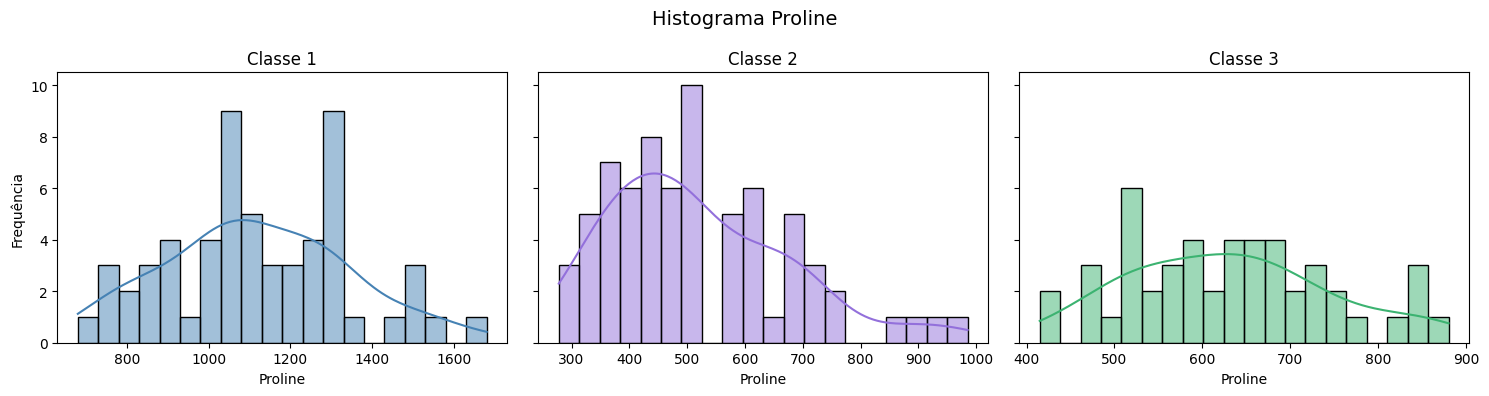

In [7]:
classes = data['Class'].unique() 
cores = ['#4682B4', '#9370DB', '#3CB371']

for col in data.columns[1:]:
    fig, axes = plt.subplots(1, len(classes), figsize=(5 * len(classes), 4), sharey=True) 
    fig.suptitle(f'Histograma {col}', fontsize=14)

    for i, classe in enumerate(classes):
        selecao_classe = data[data['Class'] == classe]
        sns.histplot(data=selecao_classe, x=col, bins=20,kde=True, ax=axes[i], color=cores[i]) # kre(Kernel Density Estimate) -- adiciona curva de densidade
        axes[i].set_title(f'Classe {classe}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()


3. O dataset Iris não possui valores ausentes. A base escolhida também pode conter todos os descritores por cada amostra. Use um dataset e sobre as amostras impute valores ausentes usando a média, mediana ou outras medidas.

In [8]:
# O dataset não possui valores ausentes (NaN)

#Resumo de todos os atributos. Se um atributo for quantitativo, ele exibirá sua média, desvio padrão e vários valores de quantis (incluindo mínimo, mediano e máximo).
#Se um atributo for qualitativo, ele exibirá seu número de valores exclusivos e os valores principais (mais frequentes).

data.describe(include='all')
    

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
# Para verificar se há valores ausentes:

data.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [10]:
# Examina linhas com valores ausentes em qualquer coluna:

data.loc[data.isnull().any(axis=1)]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline


In [11]:
# Sustitui os valores NaN por valores zeros (0s):
data.fillna(0)

# Sustitui os valores NaN pela média da coluna:
data.fillna(data.mean())

# Sustitui os valores NaN pela mediana da coluna:
data.fillna(data.median())


,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


4. Após aplicação das operações, faça a representação gráfica com histogramas das novas características dos dados analisados.

Como o dataset não possui valores ausentes, a representação gráfica, com histogramas, segue a mesma que demonstrada no exercício 2

5. Compare os resultados obtidos usando um gráfico box plot. Que atributos possuem distribuições mais simétricas? Há a presença de valores extremos, denominados de outliers, para os atributos?

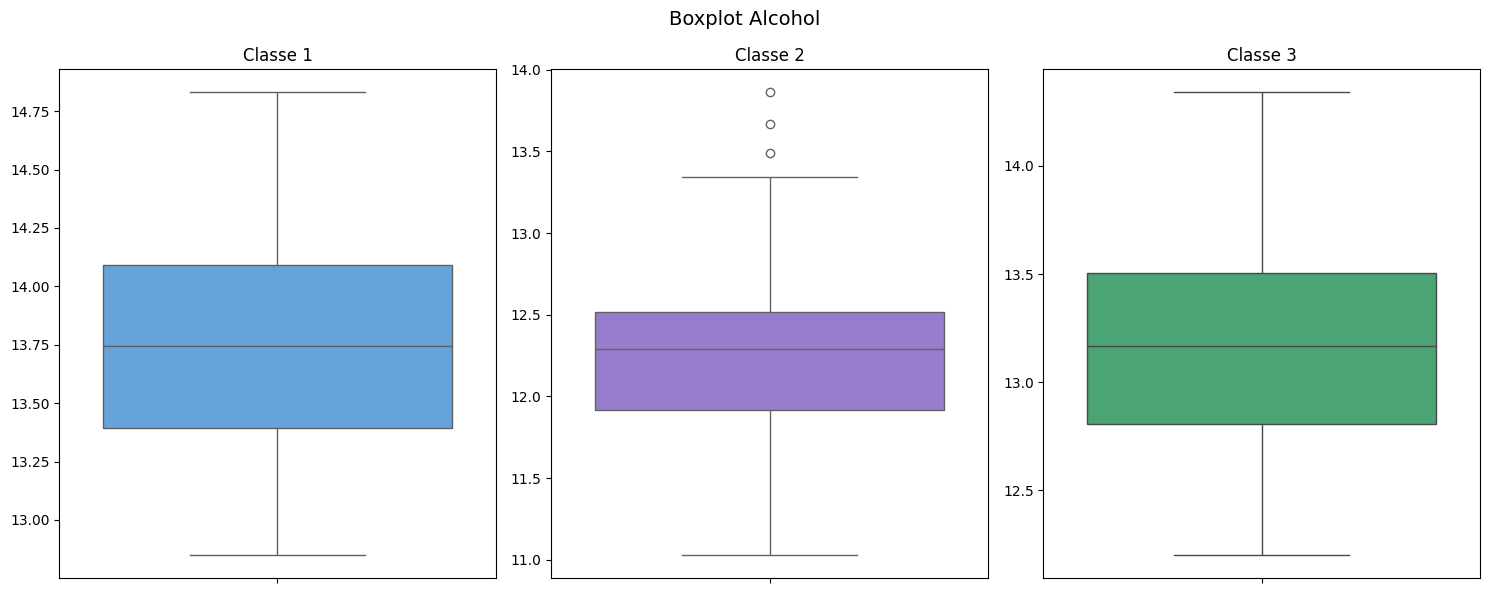

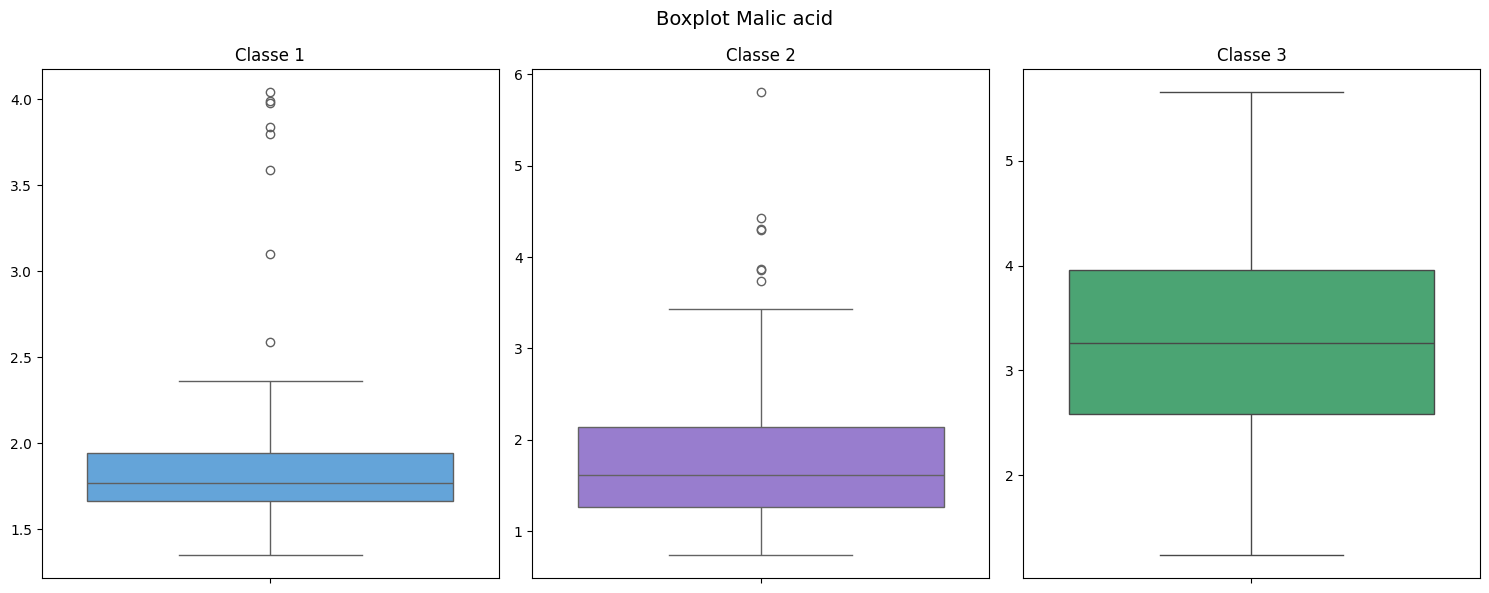

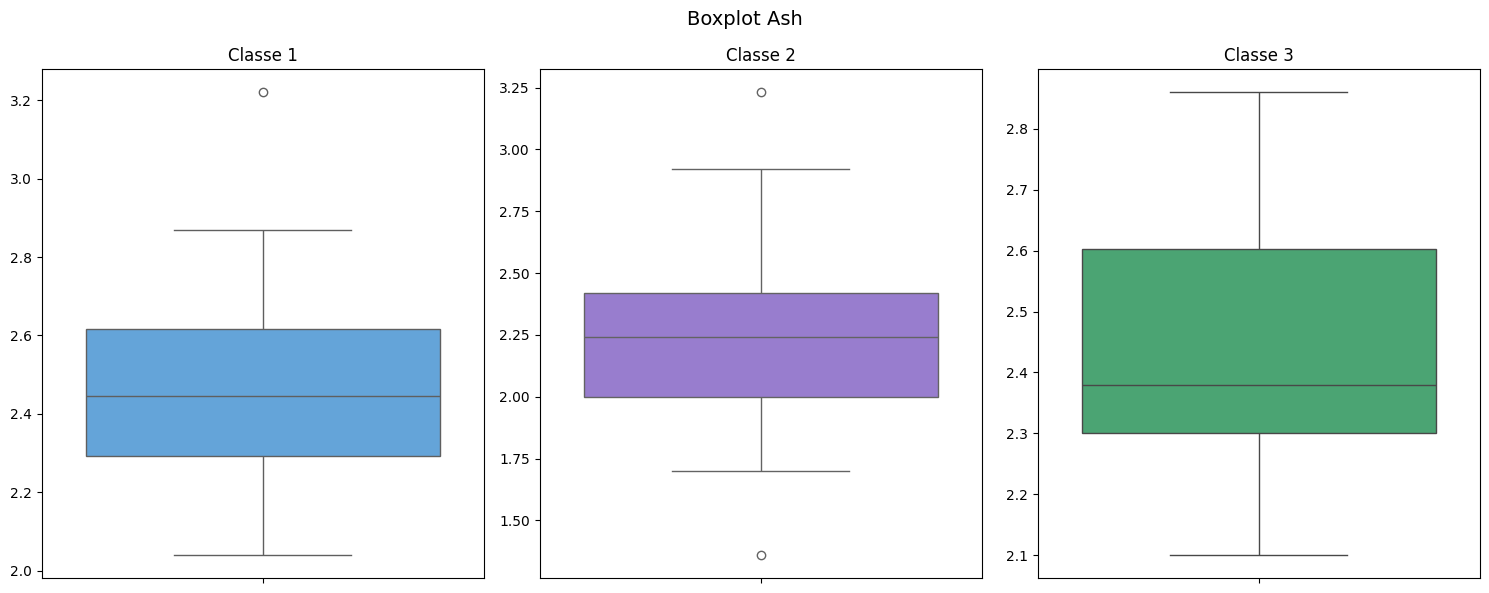

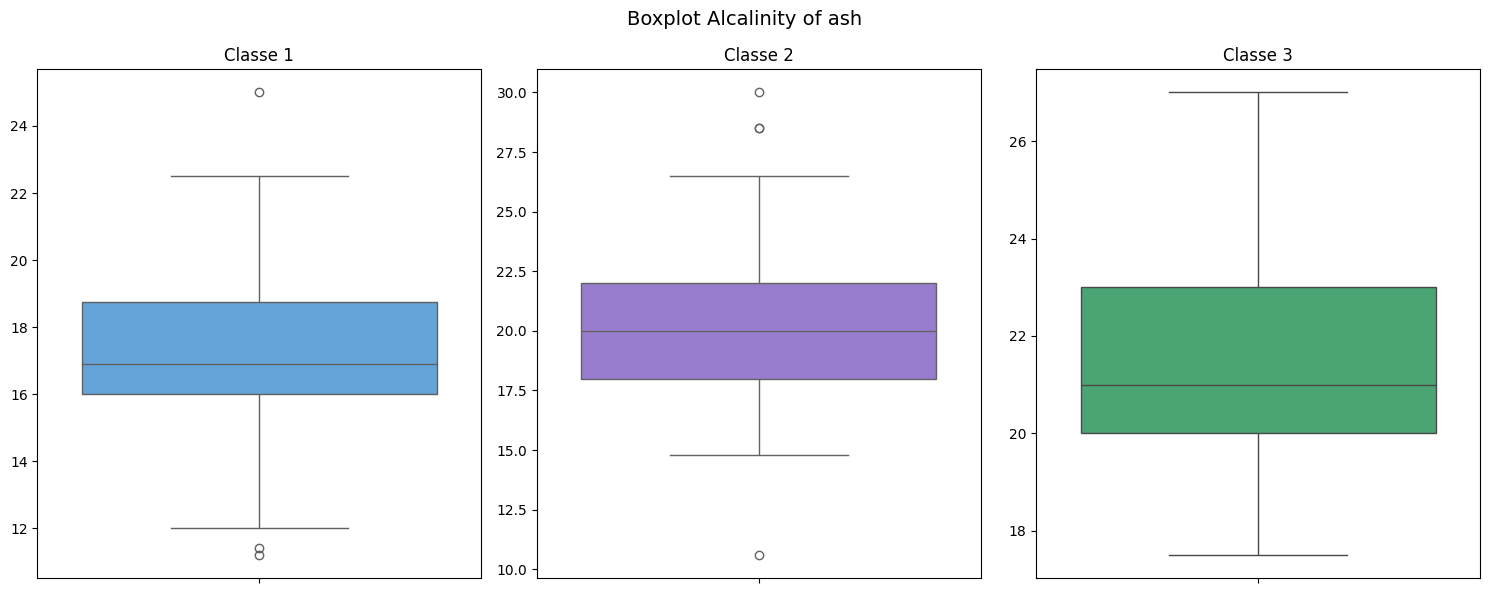

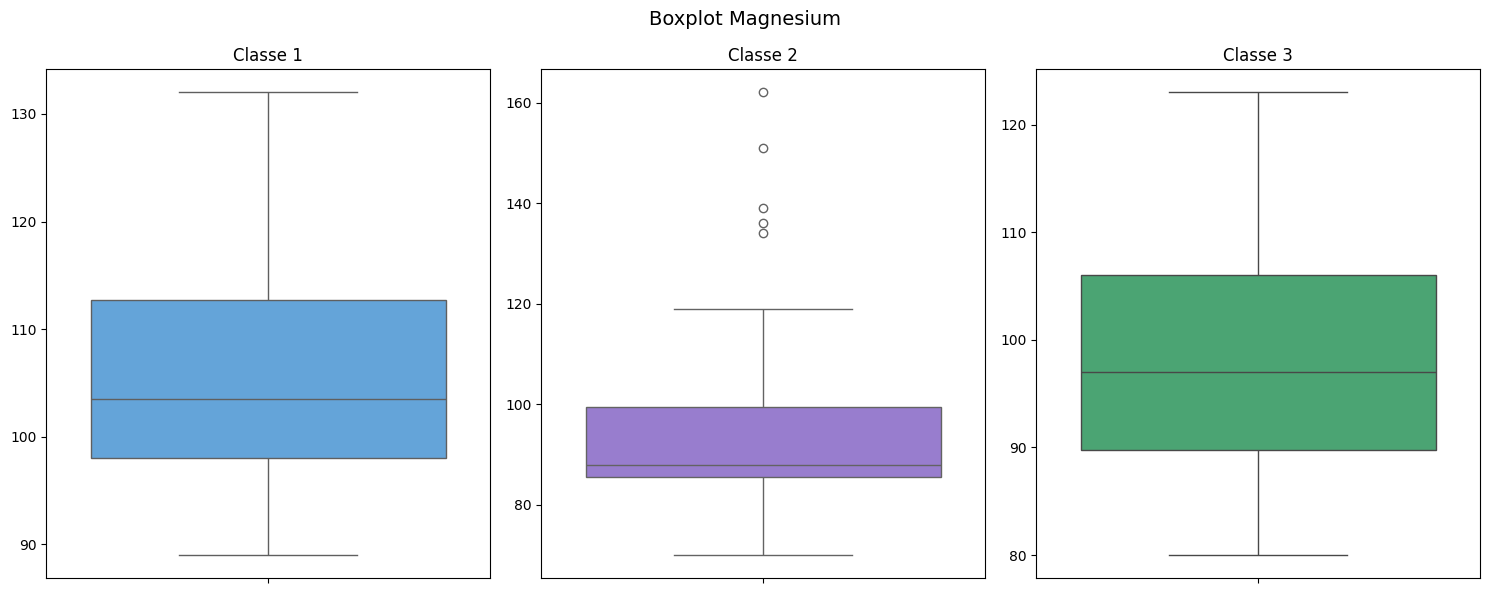

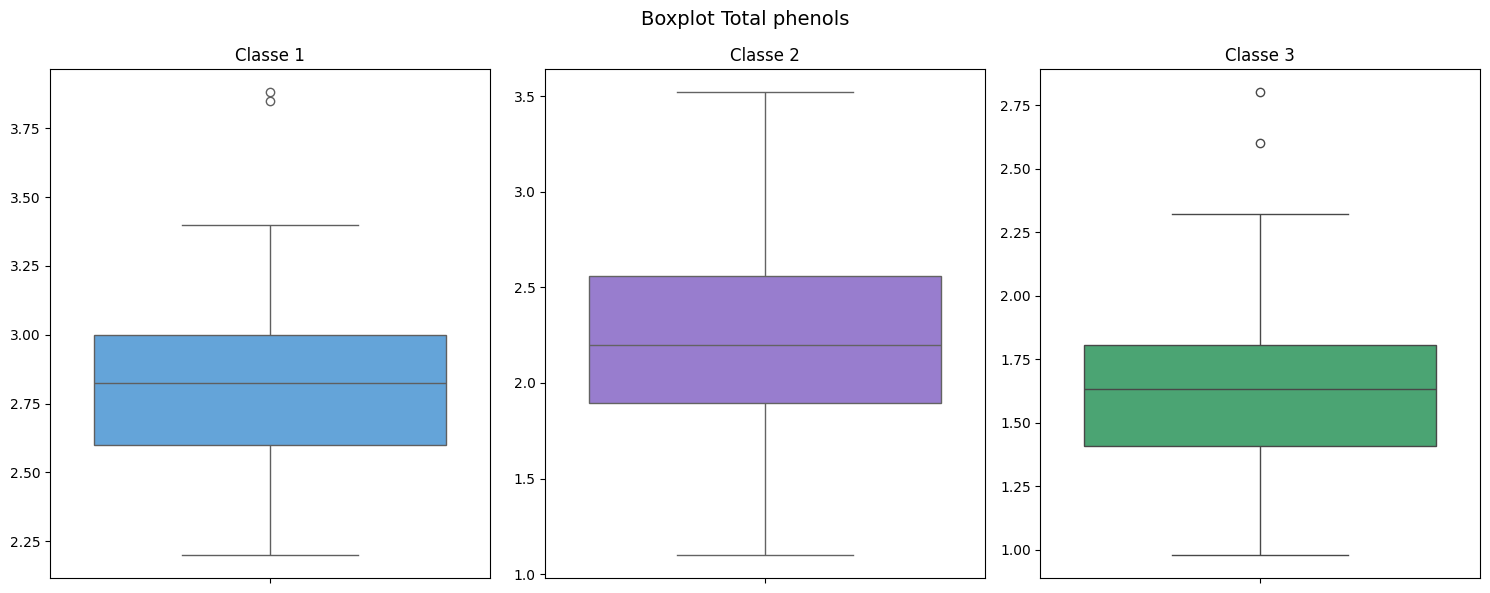

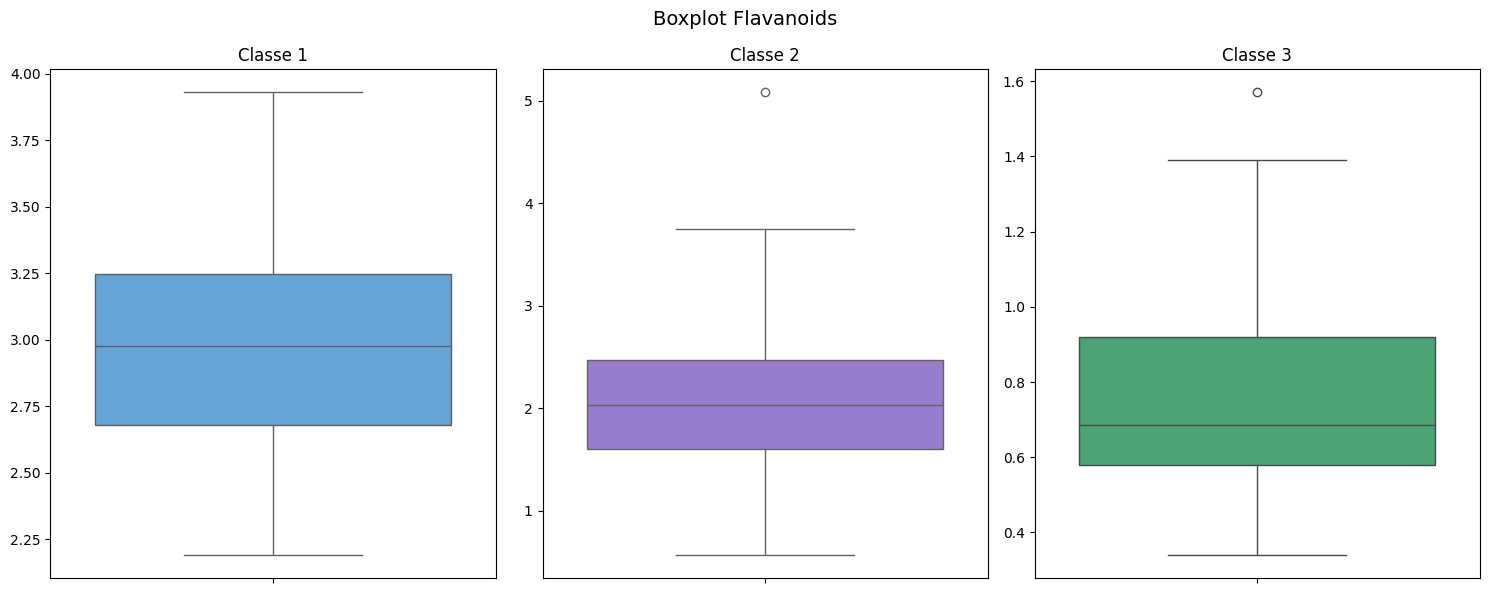

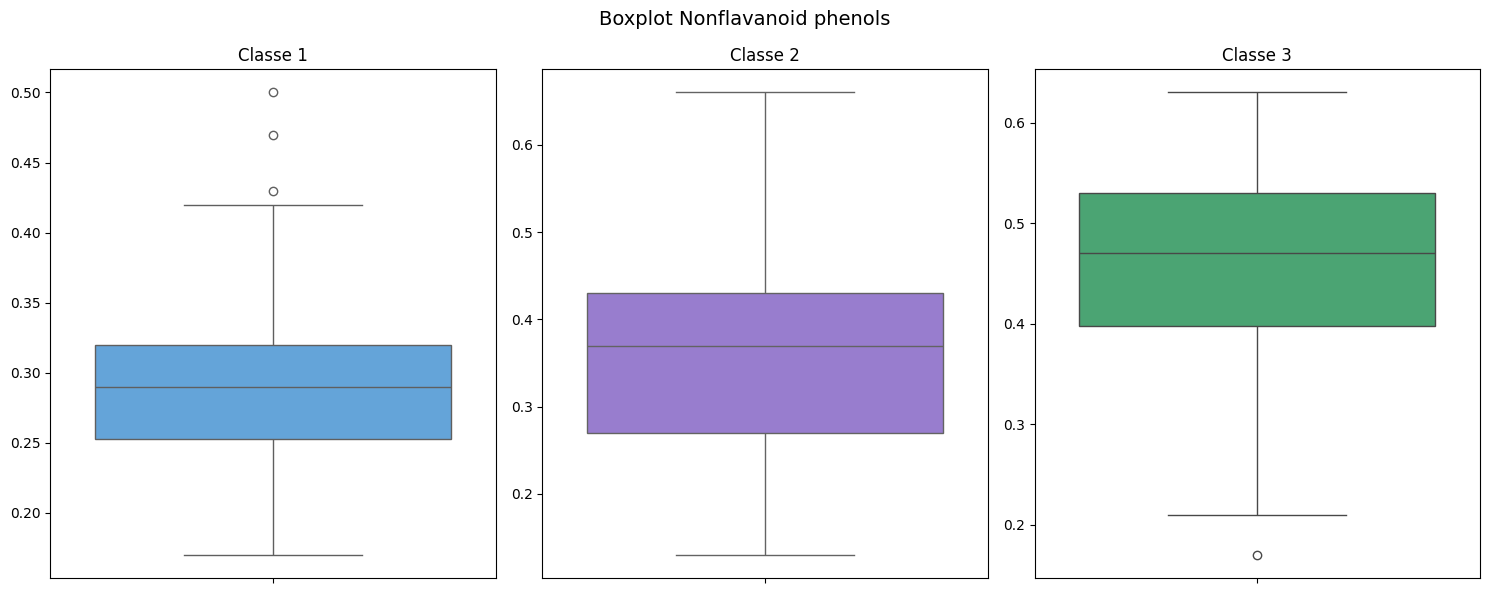

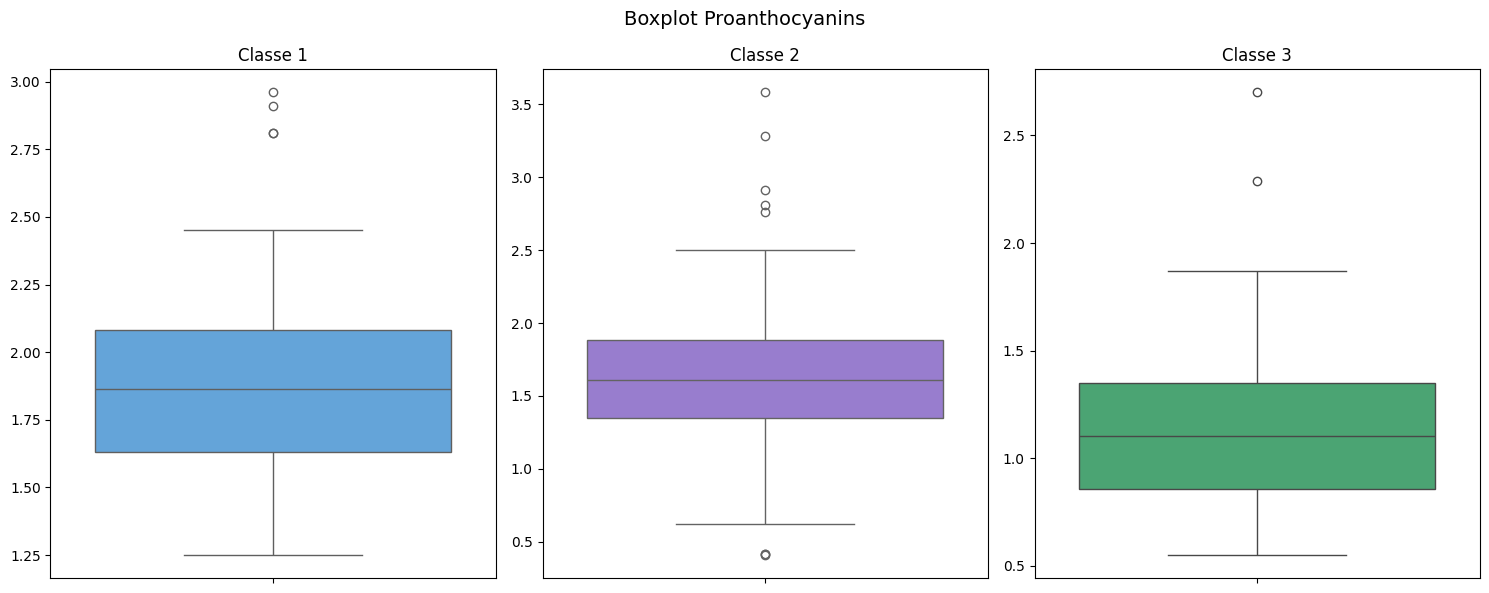

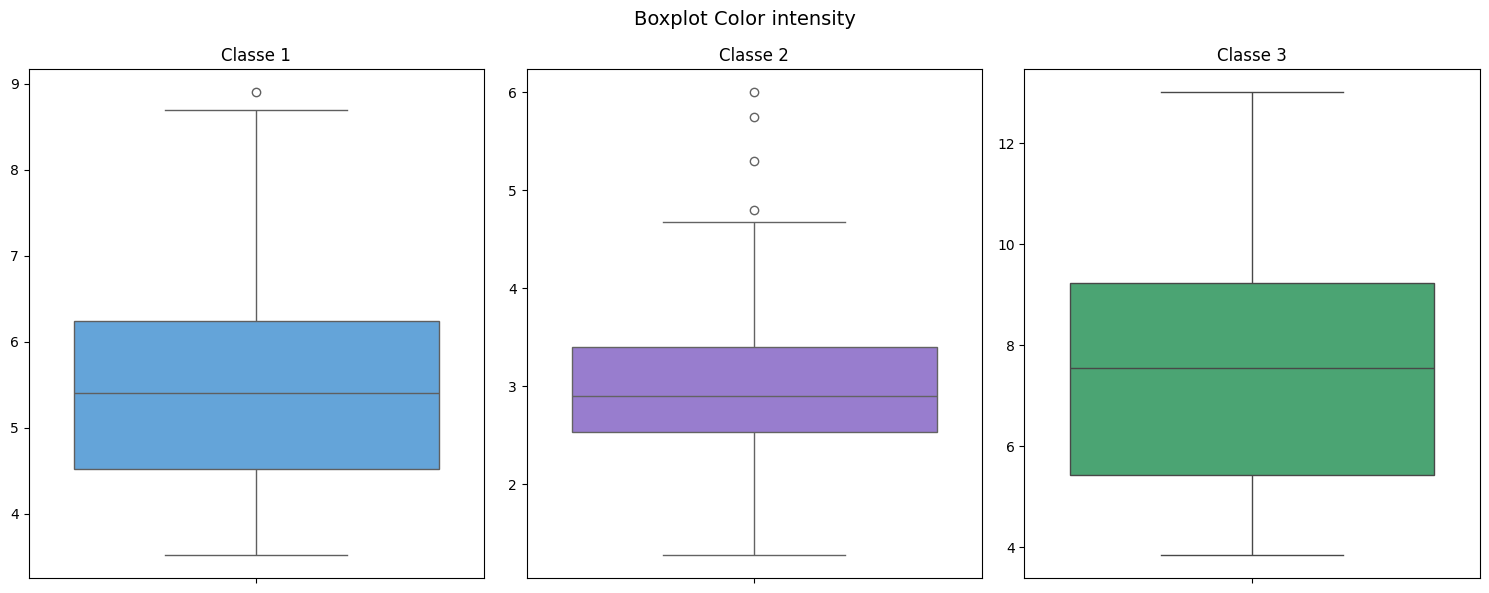

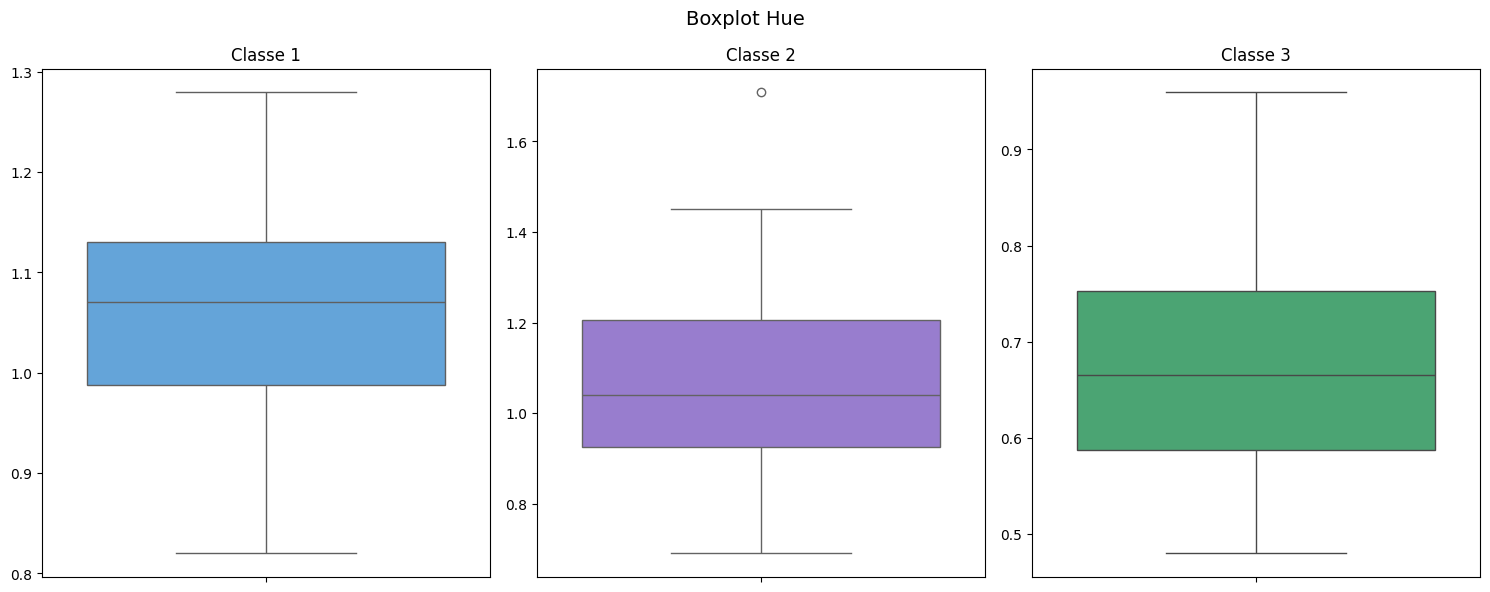

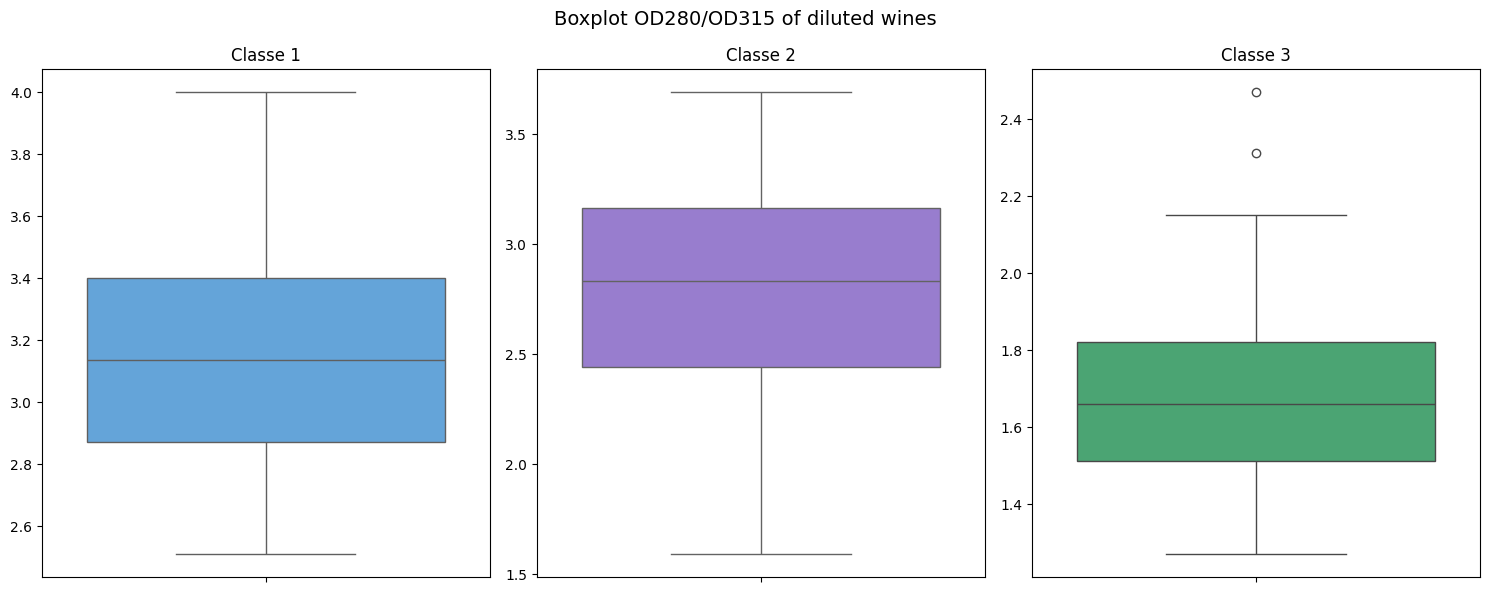

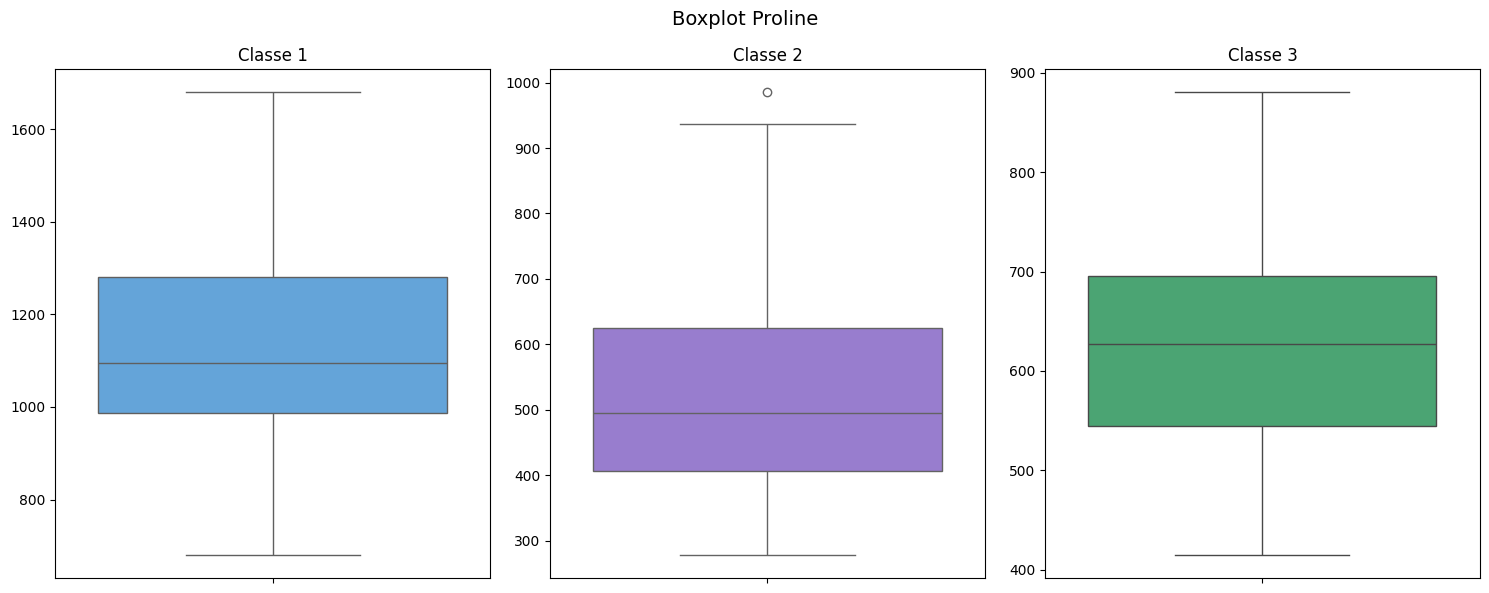

In [12]:
classes = data['Class'].unique() 
cores = ["#51A6EC", '#9370DB', '#3CB371']

for col in data.columns[1:]:
    fig, axes = plt.subplots(1, len(classes), figsize=(5 *len(classes), 6)) 
    fig.suptitle(f'Boxplot {col}', fontsize=14)

    for i, classe in enumerate(classes):
        selecao_classe = data[data['Class'] == classe]
        sns.boxplot(data=selecao_classe, y=col, ax=axes[i], color=cores[i])
        axes[i].set_title(f'Classe {classe}')
        axes[i].set_ylabel("")

    plt.tight_layout()
    plt.show()

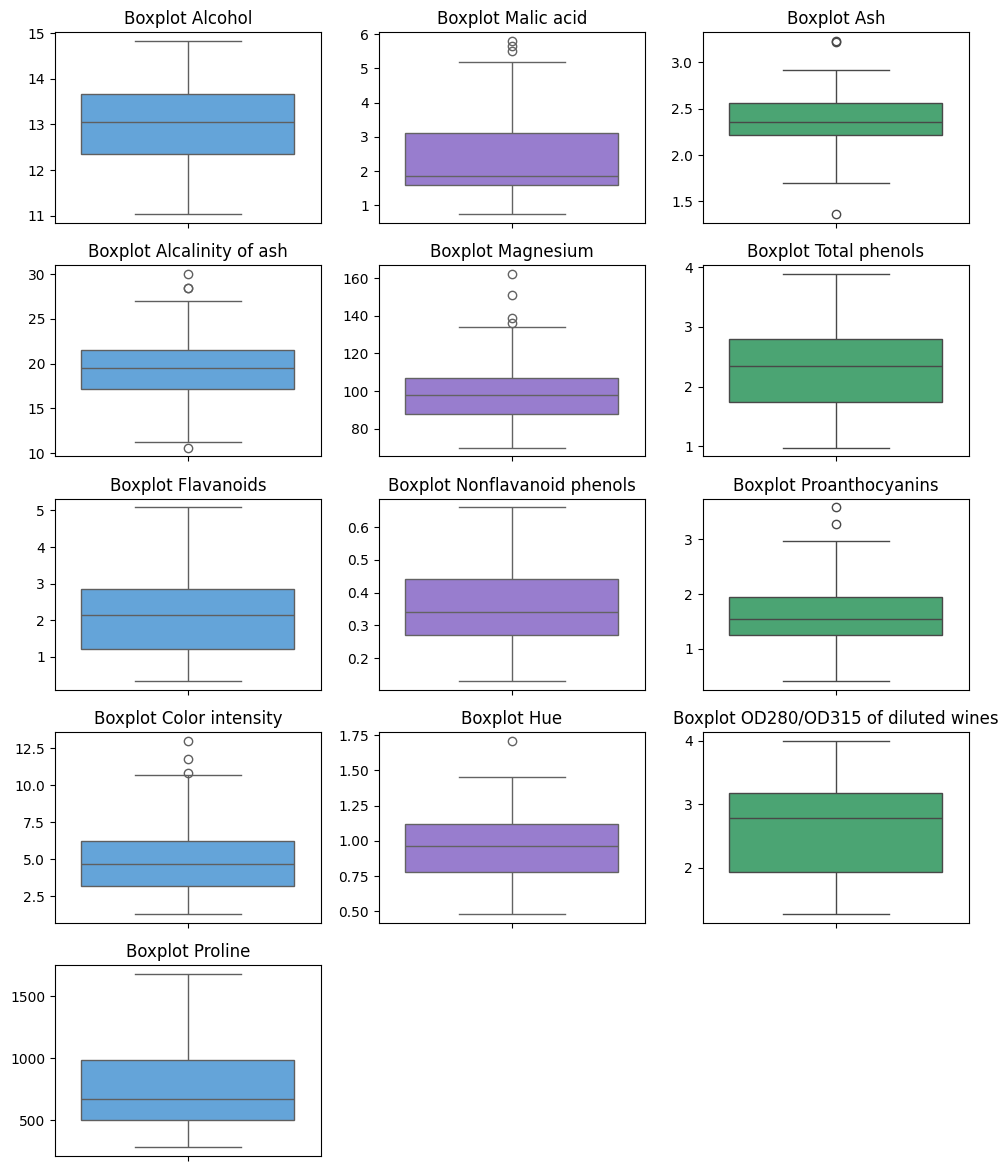

In [13]:
cores = ["#51A6EC", '#9370DB', '#3CB371']

fig, axes = plt.subplots(5, 3, figsize=(10, 12)) 

for i, col in enumerate(data.columns[1:]):
    ax=axes[i // 3, i % 3]
    sns.boxplot(data=data, y=col, color=cores[i % len(cores)], ax=ax)
    ax.set_title(f'Boxplot {col}', fontsize=12)
    ax.set_ylabel("")
    plt.tight_layout()

axes[4, 1].set_visible(False)
axes[4, 2].set_visible(False)


plt.show()

Entre os atributos, o álcool é o que possui a maior simetria de atributos.
É possível observar diversos outliers - indicados por símbolos circulares no gráfico - em atributos como, por exemplo, 'Malic Acid', 'Ash' e 'Magnesium'.

6. No dataset escolhido selecione intervalos de amostragem (10%, 30% e 50% - Progressiva) e faça análises sobre os dados em relação as métricas estatísticas. O que você pode observar sobre os subconjuntos em relação as métricas estatísticas com a nova composição dos dados?

In [14]:
amostragem = [0.1, 0.3, 0.5, 0.7, 1]

for p in amostragem:
    print(50*'=',f'\nAnálise estatística de {p*100:.0f}% dos dados\n' + 50*'=')
    
    n_primeiras = int(len(data) * p)
    amostra = data.iloc[:n_primeiras]

    print(amostra.describe())
    print("")

Análise estatística de 10% dos dados
       Class    Alcohol  Malic acid        Ash  Alcalinity of ash   Magnesium  \
count   17.0  17.000000   17.000000  17.000000          17.000000   17.000000   
mean     1.0  14.010000    1.865882   2.468824          16.258824  105.000000   
std      0.0   0.500762    0.312051   0.204263           2.944287   10.331989   
min      1.0  13.160000    1.350000   2.140000          11.200000   89.000000   
25%      1.0  13.750000    1.730000   2.320000          14.600000   97.000000   
50%      1.0  14.100000    1.810000   2.450000          16.800000  102.000000   
75%      1.0  14.370000    1.950000   2.620000          18.000000  113.000000   
max      1.0  14.830000    2.590000   2.870000          21.000000  121.000000   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
count      17.000000   17.000000             17.000000        17.000000   
mean        2.882353    3.060000              0.304118         1.988235   
std     

Com o aumento da amostra, as métricas estatísticas tornam-se mais estáveis e mais próximas das do dataset completo. Enquanto isso, amostras pequenas são mais sensíveis a variações excepcionais, como outliers, podendo distorcer a percepção da real distribuição dos dados.